### Vaibhav Kumar
### Roll No : 19

### Linear Regression , Weather Dataset , Weather Prediction Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
dfw=pd.read_csv('D:\\vk\\TRIM 3\\ML\\DATASET\\Weather.csv')

C:\Users\studentadmin\AppData\Local\Temp\ipykernel_2960\2889413408.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  dfw=pd.read_csv('D:\\vk\\TRIM 3\\ML\\DATASET\\Weather.csv')


In [3]:
dfw

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dfw.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:

dfw.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [6]:
dfw.shape

(119040, 31)

In [7]:
x=dfw['MaxTemp']
y=dfw['MinTemp']

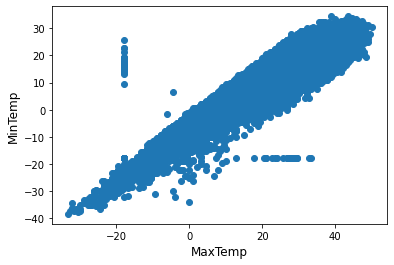

In [8]:
plt.scatter(x,y)
plt.xlabel('MaxTemp',fontsize='12')
plt.ylabel('MinTemp',fontsize='12')
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

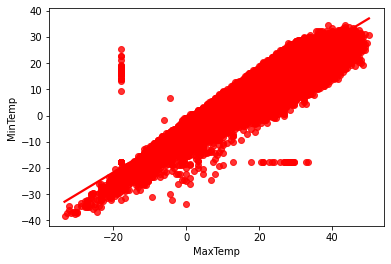

In [9]:
sns.regplot(x,y,color='red')

In [10]:
x.head()

0    25.555556
1    28.888889
2    26.111111
3    26.666667
4    26.666667
Name: MaxTemp, dtype: float64

In [11]:
y.head()

0    22.222222
1    21.666667
2    22.222222
3    22.222222
4    21.666667
Name: MinTemp, dtype: float64

In [12]:
x.shape

(119040,)

In [13]:
X_=x.values.reshape(-1,1)

In [14]:
X_.shape

(119040, 1)

In [15]:
x

0         25.555556
1         28.888889
2         26.111111
3         26.666667
4         26.666667
            ...    
119035    28.333333
119036    29.444444
119037    28.333333
119038    28.333333
119039    29.444444
Name: MaxTemp, Length: 119040, dtype: float64

In [16]:
X_

array([[25.55555556],
       [28.88888889],
       [26.11111111],
       ...,
       [28.33333333],
       [28.33333333],
       [29.44444444]])

### Model


In [17]:
X_train,X_test,y_train,y_test=train_test_split(X_,y,test_size=0.2,random_state=30)

In [18]:
X_train.shape

(95232, 1)

In [19]:
X_test.shape

(23808, 1)

In [20]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred=LR.predict(X_test)

In [22]:
y_test

39071     12.222222
5109      22.222222
1113      22.222222
117003     7.777778
106549    26.111111
            ...    
83309     12.222222
75290      6.111111
62785      8.888889
80737      6.111111
25569     22.777778
Name: MinTemp, Length: 23808, dtype: float64

In [23]:
y_pred

array([14.66774639, 22.13310546, 18.86701087, ..., 15.13433134,
        9.53531203, 20.2667657 ])

In [24]:
weights = LR.coef_
intercept = LR.intercept_
print(weights,intercept)

[0.8398529] -4.928821159366091


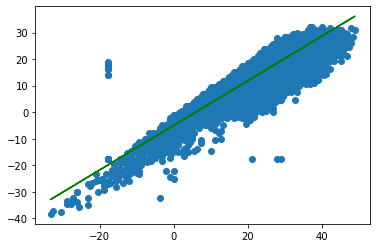

In [25]:
plt.scatter(X_test, y_test)
plt.plot(X_test,y_pred, color='green')
plt.show()

In [26]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
39071,12.222222,14.667746
5109,22.222222,22.133105
1113,22.222222,18.867011
117003,7.777778,14.667746
106549,26.111111,21.666521
...,...,...
83309,12.222222,11.868237
75290,6.111111,11.401652
62785,8.888889,15.134331
80737,6.111111,9.535312


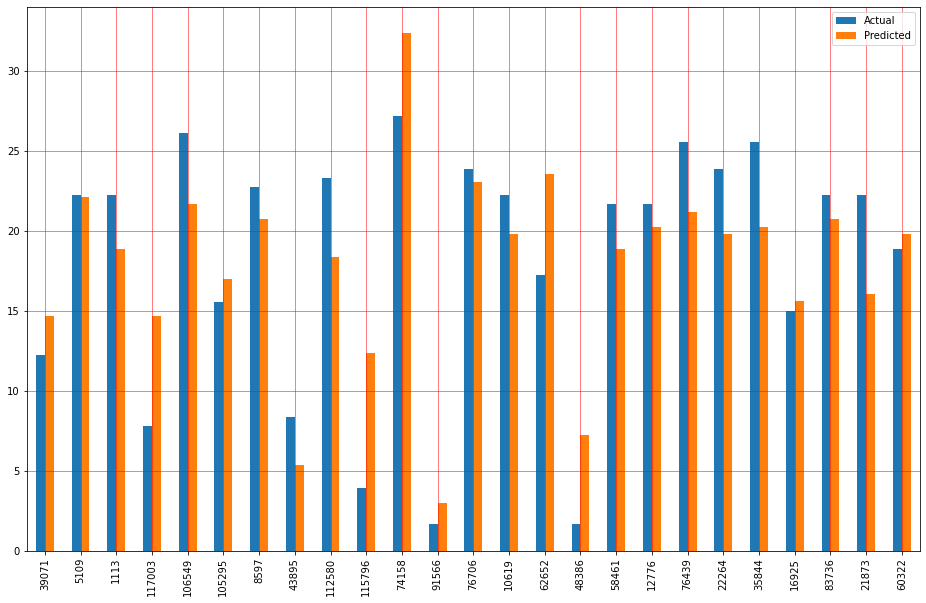

In [27]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='red')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='green')
plt.show()

In [28]:
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('Root Mean Sqaured Error',np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error 3.086071147707306
Mean Squared Error 15.642509497194942
Root Mean Sqaured Error 3.955061250751364


**80:20** ::: 
Mean Absolute Error 3.086071147707306
Mean Squared Error 15.642509497194942
Root Mean Sqaured Error 3.955061250751364


**90:10** :: 
Mean Absolute Error 3.1047256786542192
Mean Squared Error 15.83161054325677
Root Mean Sqaured Error 3.97889564367511


**70:30**
Mean Absolute Error 3.1013916713826886
Mean Squared Error 15.768060731561533
Root Mean Sqaured Error 3.970901752947501


**80:20 split has most least error compared to others**